# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Data Preprocessing 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator


# Building CNN Model & Pretraining Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout

# Downlaod Model
import pickle

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [10]:
with tf.device('/gpu:0'):
    pass

# Reading Data(Image)

In [3]:
path_folder = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\New Plant Diseases Dataset\New folder"
class_name = os.listdir(path_folder)
print(class_name)
image_data = []
label_data = []
count = 0
for folder in class_name:
    images = os.listdir(path_folder + "\\" + folder)
    print("Loading Folder -- {} " .format(folder), "The Count of Classes ==> ",count)
    for img in images:
        image = cv2.imread(path_folder + "\\" + folder + "\\" + img)
        image = cv2.resize(image, (224, 224))
        
        image_data.append(image)
        label_data.append(count)
    count += 1
print("---- Done ----------- ")

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']
Loading Folder -- Apple___Apple_scab  The Count of Classes ==>  0
Loading Folder -- Apple___Black_rot  The Count of Classes ==>  1
Loading Folder -- Apple___Cedar_apple_rust  The Count of Classes ==>  2
Loading Folder -- Apple___healthy  The Count of Classes ==>  3
Loading Folder -- Potato___Early_blight  The Count of Classes ==>  4
Loading Folder -- Potato___healthy  The Count of Classes ==>  5
Loading Folder -- Potato___Late_blight  The Count of Classes ==>  6
---- Done ----------- 


In [3]:
# train_path = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\New Plant Diseases Dataset\New folder"
# data = ImageDataGenerator(preprocessing_function=k.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224))

Found 13473 images belonging to 7 classes.


In [6]:
# type(data)

keras.preprocessing.image.DirectoryIterator

# Preprocessing Data & Visualization

In [4]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

label = np.array(label_data)

In [5]:
print(data.shape)

(13473, 224, 224, 3)


## Transform Label To One Hot Encoder

In [6]:
label_num = to_categorical(label, len(class_name))
label_num[1000]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
label_num[10000]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# Shuffle Data

In [9]:
x_img, y_img = shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8)

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10778, 224, 224, 3), (10778, 7), (2695, 224, 224, 3), (2695, 7))

# Visualization Some Data

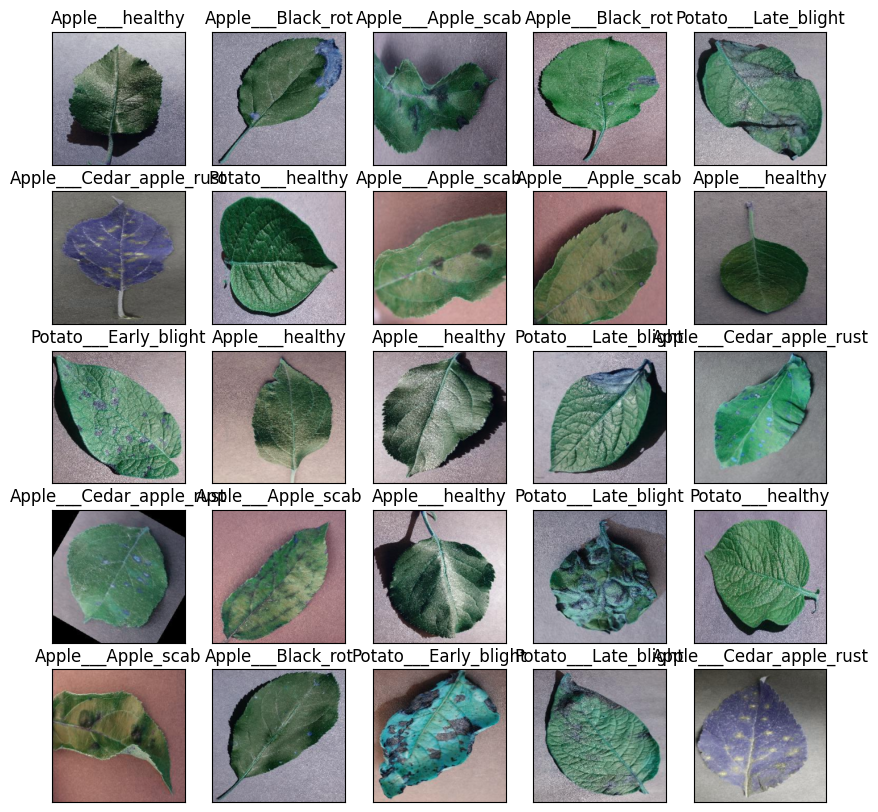

In [11]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

In [12]:
label_num[10000], label[10]

(array([0., 0., 0., 0., 0., 1., 0.], dtype=float32), 0)

# Building CNN Model

In [4]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(224, 224, 3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(64, activation="relu"))
model.add(k.layers.Dropout(0.2))

model.add(k.layers.Dense(len(class_name), activation="softmax"))

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 average_pooling2d (Average  (None, 112, 112, 16)      0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      8224      
                                                                 
 average_pooling2d_1 (Avera  (None, 56, 56, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 average_pooling2d_2 (Avera  (None, 28, 28, 64)        0

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), validation_split=0.4)

# System Prediction

In [ ]:
path_img1 = input()
image = cv2.imread(path_img1)
image = cv2.resize(image, (224, 224))
# image = image/255.0
# print(image1.shape)
new_image = np.reshape(image, [1, 224, 224, 3])

# ================== Show Prediction =================================

prediction = model.predict(new_image)[0]
# print(prediction1)


new_prediction = class_name[np.argmax(prediction)]
# print("The Prediction is ==> ", new_prediction1)

print("Type Of Planet ==>", new_prediction[:new_prediction.index("__")])
print("Type Disease Of Planet ==>", new_prediction[new_prediction.index("__")+3:])

# ================== Show image And Label Prediction =================================

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(new_prediction)
plt.show()

# Show Prediction

1/1 [==============================] - 0s 22ms/step
[0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 23ms/step
[0. 0. 1. 0. 0. 0. 0.]
1/1 [==============================] - 0s 22ms/step
[0. 0. 1. 0. 0. 0. 0.]
1/1 [==============================] - 0s 22ms/step
[0. 0. 1. 0. 0. 0. 0.]
1/1 [==============================] - 0s 23ms/step
[0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 22ms/step
[0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 22ms/step
[0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 22ms/step
[0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 22ms/step
[0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 22ms/step
[0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 22ms/step
[0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 22ms/step
[0. 0. 0. 0. 0. 0. 1.]


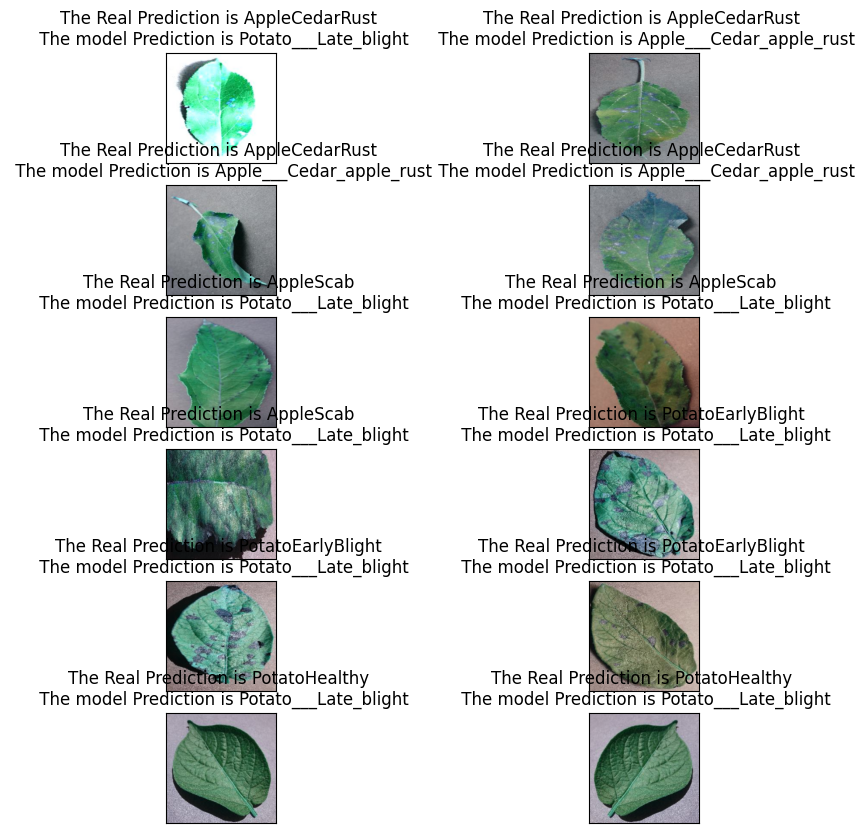

In [19]:
path_test = r"D:\Prototype-Green-Hackathon\testing"
class_name = os.listdir(train_path)

image_testing = []
label_testing = []
for img in os.listdir(path_test):
    image = path_test + "\\" + img
    image = cv2.imread(image)
    new_image = cv2.resize(image, (224, 224))
    image_testing.append(new_image)
    label_testing.append(img[:-5])

image_testing = np.array(image_testing)
label_testing = np.array(label_testing)

plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(6, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    new_image = np.resize(image_testing[i], [1, 224, 224, 3])
    prediction = model.predict(new_image)
    prediction = prediction[0]
    print(prediction)
    plt.imshow(image_testing[i])
    plt.title(f"The Real Prediction is {label_testing[i]} \n The model Prediction is {class_name[np.argmax(prediction)]}")

# Download CNN Model

In [20]:
# pickle.dump(model, open("D:\Pycharm\model_pickle\Prototype-Green Hackathon_model.bin", "wb"))

In [21]:
pickle.dump(model, open("D:\Pycharm\model_pickle\Prototype-Green Hackathon_model(V2).bin", "wb"))